In [5]:
# script to get and plot TTS for rf11 with varying bl conditions
# date created: 3/26/2020
# author: sofia chelpon

In [6]:
############################ PREP WORKSPACE ############################

In [26]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [45]:
# read in ratios dataframe
path = "./contrast_ratios_perrf.pkl"
contrast_ratios = pd.read_pickle(path)
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.describe()

,BL_tau,TROPO_tau,UT_tau,RF05_CampAvg,RF06_CampAvg,RF07_CampAvg,RF08_CampAvg,RF09_CampAvg,RF10_CampAvg,RF11_CampAvg,RF12_CampAvg,RF13_CampAvg,RF14_CampAvg
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000
mean,4774.684430,5089.155498,7238.742283,0.692288,0.770649,0.771426,0.654077,0.697404,0.661726,0.675865,0.659116,0.646129,0.616701
std,12317.773925,12248.729426,13510.275842,0.347136,0.283818,0.312749,0.351329,0.335356,0.357868,0.327053,0.397892,0.346577,0.365298
min,0.289063,0.365920,0.376967,0.015992,-0.023356,-0.210601,-0.160940,0.014823,-0.409410,0.005929,0.008627,-0.080105,0.000000
25%,4.923640,9.367925,18.127006,0.361315,0.611697,0.605995,0.321377,0.384871,0.323291,0.471620,0.243560,0.345037,0.281442
50%,33.300633,86.696825,312.095364,0.750056,0.874559,0.888226,0.772150,0.812508,0.773681,0.755442,0.752601,0.726198,0.701714
75%,1010.298211,3113.025423,10500.000000,0.992942,1.002752,0.993219,0.978647,0.994785,0.985426,0.991850,0.980862,0.979190,0.993338
max,69000.000000,69000.000000,69000.000000,1.247808,1.049679,1.371031,1.034976,1.093154,1.088553,1.046165,1.746157,1.032001,1.127995


In [43]:
# tau, same for all 
tau_bl = ratios_sort['BL_tau'].values
tau_tr = ratios_sort['TROPO_tau'].values

# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_bl)

In [29]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3f92f890>,
       dtype=object),
 434.63750000000005,
 200.5)

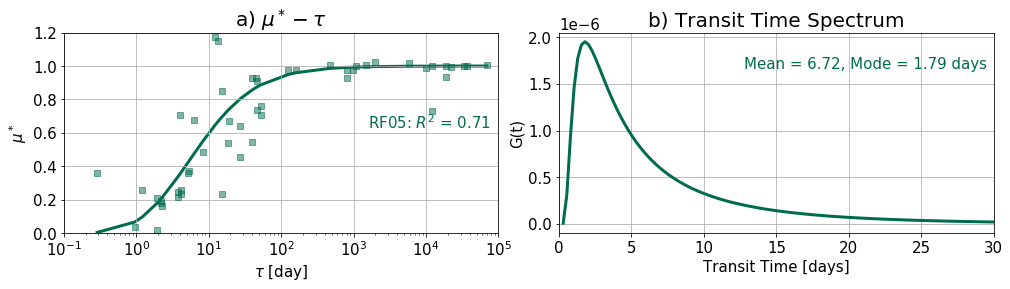

In [30]:
# rf05 
utbl_05 = ratios_sort['RF05_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_05, my_r2_cavg_05, my_gf_cavg_05, my_t_cavg_05, mean_age_cavg_05,  \
    mode_age_cavg_05, best_k_cavg_05 = tts_mod.get_tts(utbl_05, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF05: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_05, utbl_05, my_r2_cavg_05, 
                        my_gf_cavg_05, my_t_cavg_05, mean_age_cavg_05, mode_age_cavg_05, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c49db0d10>,
       dtype=object),
 434.63750000000005,
 200.5)

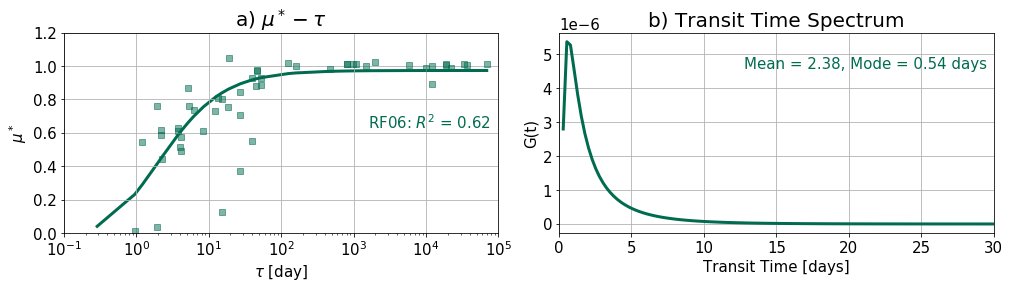

In [31]:
#rf06 
utbl_06 = ratios_sort['RF06_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_06, my_r2_cavg_06, my_gf_cavg_06, my_t_cavg_06, mean_age_cavg_06,  \
    mode_age_cavg_06, best_k_cavg_06 = tts_mod.get_tts(utbl_06, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF06: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_06, utbl_06, my_r2_cavg_06, 
                        my_gf_cavg_06, my_t_cavg_06, mean_age_cavg_06, mode_age_cavg_06, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3c8b6490>,
       dtype=object),
 434.63750000000005,
 200.5)

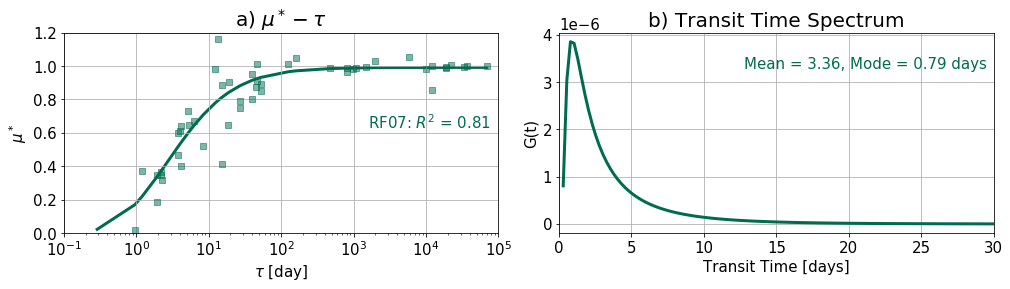

In [32]:
# rf07 
utbl_07 = ratios_sort['RF07_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_07, my_r2_cavg_07, my_gf_cavg_07, my_t_cavg_07, mean_age_cavg_07,  \
    mode_age_cavg_07, best_k_cavg_07 = tts_mod.get_tts(utbl_07, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF07: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_07, utbl_07, my_r2_cavg_07, 
                        my_gf_cavg_07, my_t_cavg_07, mean_age_cavg_07, mode_age_cavg_07, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c4c2210d0>,
       dtype=object),
 434.63750000000005,
 200.5)

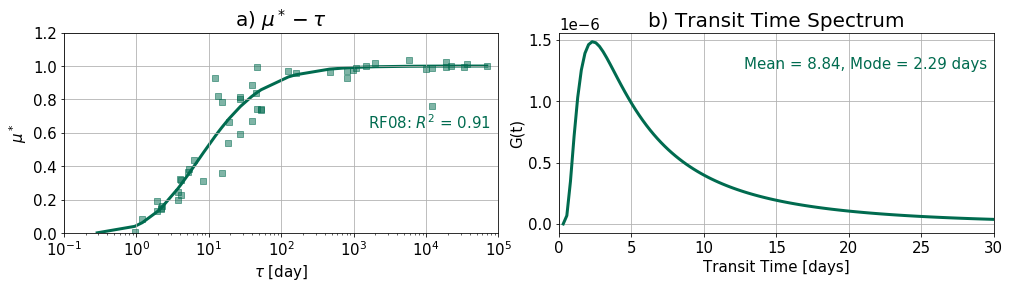

In [33]:
# rf08 
utbl_08 = ratios_sort['RF08_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_08, my_r2_cavg_08, my_gf_cavg_08, my_t_cavg_08, mean_age_cavg_08,  \
    mode_age_cavg_08, best_k_cavg_08 = tts_mod.get_tts(utbl_08, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF08: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_08, utbl_08, my_r2_cavg_08, 
                        my_gf_cavg_08, my_t_cavg_08, mean_age_cavg_08, mode_age_cavg_08, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c4d554450>,
       dtype=object),
 434.63750000000005,
 200.5)

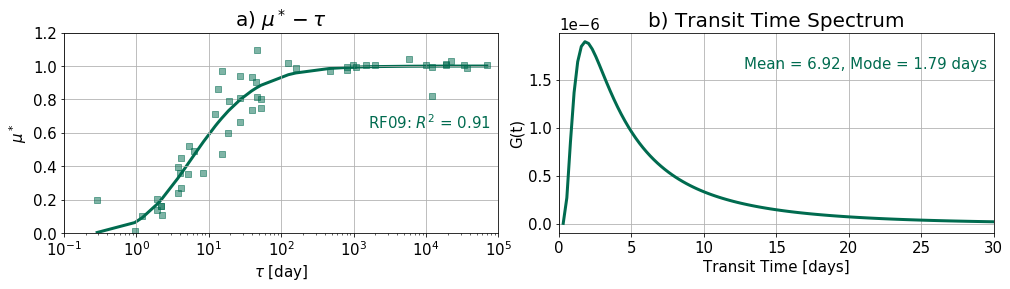

In [34]:
# rf09 
utbl_09 = ratios_sort['RF09_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_09, my_r2_cavg_09, my_gf_cavg_09, my_t_cavg_09, mean_age_cavg_09,  \
    mode_age_cavg_09, best_k_cavg_09 = tts_mod.get_tts(utbl_09, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF09: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_09, utbl_09, my_r2_cavg_09, 
                        my_gf_cavg_09, my_t_cavg_09, mean_age_cavg_09, mode_age_cavg_09, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c4e89f510>,
       dtype=object),
 434.63750000000005,
 200.5)

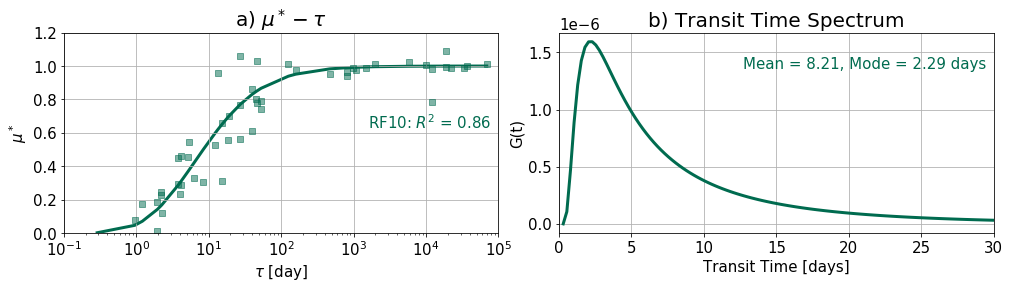

In [35]:
# rf10 
utbl_10 = ratios_sort['RF10_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_10, my_r2_cavg_10, my_gf_cavg_10, my_t_cavg_10, mean_age_cavg_10,  \
    mode_age_cavg_10, best_k_cavg_10 = tts_mod.get_tts(utbl_10, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF10: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_10, utbl_10, my_r2_cavg_10, 
                        my_gf_cavg_10, my_t_cavg_10, mean_age_cavg_10, mode_age_cavg_10, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c4e89fa50>,
       dtype=object),
 434.63750000000005,
 200.5)

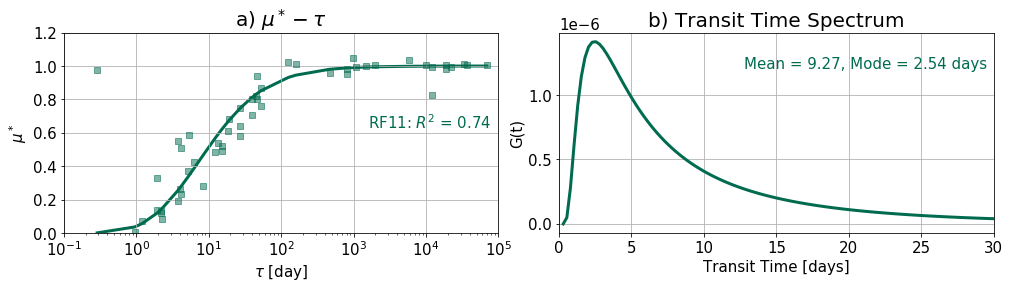

In [36]:
# rf11
utbl_11 = ratios_sort['RF11_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_11, my_r2_cavg_11, my_gf_cavg_11, my_t_cavg_11, mean_age_cavg_11,  \
    mode_age_cavg_11, best_k_cavg_11 = tts_mod.get_tts(utbl_11, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF11: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_11, utbl_11, my_r2_cavg_11, 
                        my_gf_cavg_11, my_t_cavg_11, mean_age_cavg_11, mode_age_cavg_11, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c50cdf310>,
       dtype=object),
 434.63750000000005,
 200.5)

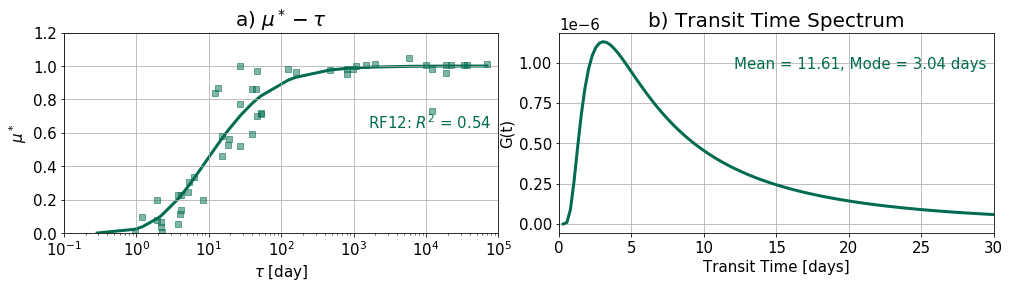

In [37]:
# rf12 
utbl_12 = ratios_sort['RF12_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_12, my_r2_cavg_12, my_gf_cavg_12, my_t_cavg_12, mean_age_cavg_12,  \
    mode_age_cavg_12, best_k_cavg_12 = tts_mod.get_tts(utbl_12, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF12: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_12, utbl_12, my_r2_cavg_12, 
                        my_gf_cavg_12, my_t_cavg_12, mean_age_cavg_12, mode_age_cavg_12, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c52030290>,
       dtype=object),
 434.63750000000005,
 200.5)

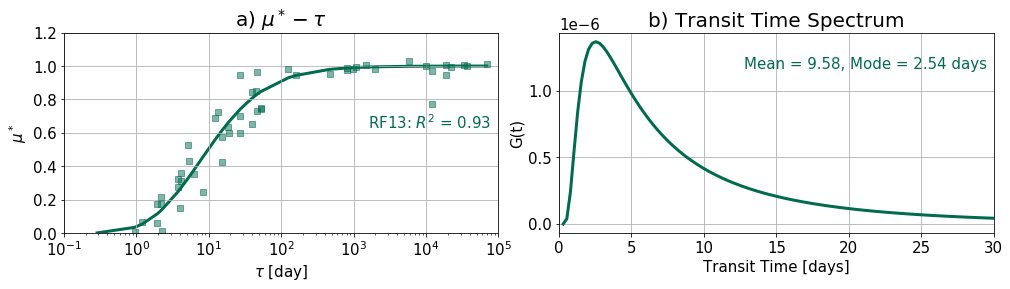

In [38]:
# rf13 
utbl_13 = ratios_sort['RF13_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_13, my_r2_cavg_13, my_gf_cavg_13, my_t_cavg_13, mean_age_cavg_13,  \
    mode_age_cavg_13, best_k_cavg_13 = tts_mod.get_tts(utbl_13, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF13: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_13, utbl_13, my_r2_cavg_13, 
                        my_gf_cavg_13, my_t_cavg_13, mean_age_cavg_13, mode_age_cavg_13, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)

(<Figure size 1008x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c53323f10>,
       dtype=object),
 434.63750000000005,
 200.5)

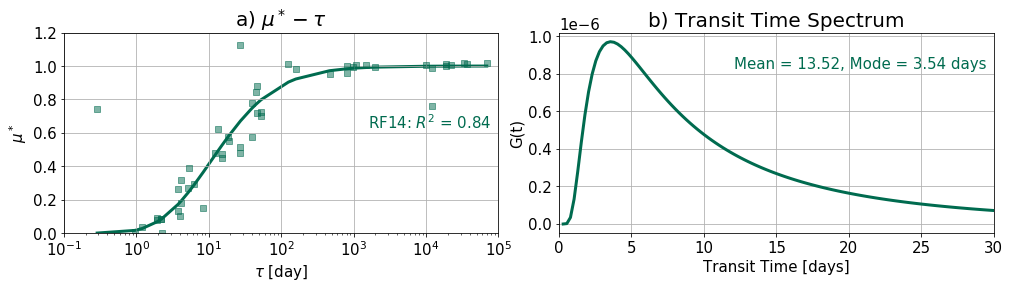

In [44]:
# rf14
utbl_full = np.array(ratios_sort['RF14_CampAvg'].values, dtype=np.float64)
utbl_not_null_idx = np.argwhere(~np.isnan(utbl_full))
# ----- inputs without nans 
utbl_14 = utbl_full[utbl_not_null_idx]
tau_bl = tau_bl[utbl_not_null_idx]
    
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_bl)    
    
# BL TAU -----
# get tts 
my_mustar_cavg_14, my_r2_cavg_14, my_gf_cavg_14, my_t_cavg_14, mean_age_cavg_14,  \
    mode_age_cavg_14, best_k_cavg_14 = tts_mod.get_tts(utbl_14, tau_bl, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF14: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

tts_mod.plot_tts(tau_bl, my_mustar_cavg_14, utbl_14, my_r2_cavg_14, 
                        my_gf_cavg_14, my_t_cavg_14, mean_age_cavg_14, mode_age_cavg_14, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)